# Задача на регуляризцию

Загрузка данных

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

data = pd.read_csv('data/non_linear.csv', sep=',')
data.head()

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.119
Качество на обучении: 0.052


/Users/msomova/all/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.97797e-18): result may not be accurate.
  overwrite_a=True).T


у класса *Ridge* в конструкторе есть параметр регуляризации - обучите регрессию при $\alpha=0.01$. 

Как изменилась ошибка на обучении? Как изменилась ошибка на валидации? Удалось ли победить переобучение? Используйте степень полинома n=12

In [2]:
degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.077
Качество на обучении: 0.058


/Users/msomova/all/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.80386e-22): result may not be accurate.
  overwrite_a=True).T


При $\alpha=0.01$ и степени полинома n=12 качество модели на валидации ухудшилось, на обучении - улучшилось.

### Домашняя работа: Lasso vs Ridge

На данных из файла `data/non_linear.csv`
* сгенерируйте данные до степени *degree = 8* включительно
* обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных
* используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей
* постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](img/coeff_example.png)

/Users/msomova/all/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7134369621139607, tolerance: 0.002448155578496404
  positive)


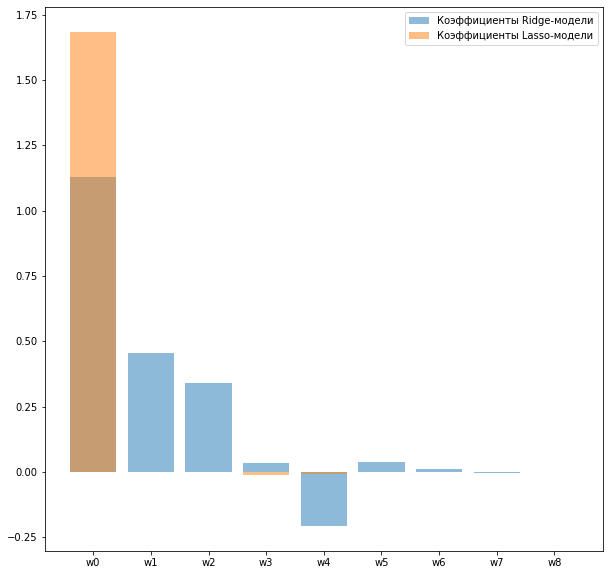

In [3]:
import matplotlib.pyplot as plt


degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

ridge_model = Ridge(alpha=0.8).fit(X_train, y_train)
lasso_model = Lasso(alpha=0.8).fit(X_train, y_train)

f, ax = plt.subplots(figsize=(10,10))
ax.bar([f"w{i}" for i in range(0, len(np.concatenate((np.array(ridge_model.intercept_), np.array(ridge_model.coef_)), axis=None)))], 
       np.concatenate((np.array(ridge_model.intercept_), np.array(ridge_model.coef_)), axis=None), alpha = 0.5, label='Коэффициенты Ridge-модели')
ax.bar([f"w{i}" for i in range(0, len(np.concatenate((np.array(lasso_model.intercept_), np.array(lasso_model.coef_)), axis=None)))], 
       np.concatenate((np.array(lasso_model.intercept_), np.array(lasso_model.coef_)), axis=None), alpha = 0.5, label='Коэффициенты Lasso-модели')
plt.legend()
plt.show()

# Домашнее задание: пишем Ridge регрессию.

Мы использовали реализацию Ridge регрессию из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

Аналитически определённые коэффициенты [-3.96944291e-01  1.24987870e+01 -2.61921535e+01  2.74351226e+01
 -1.56366215e+01  5.03935989e+00 -9.18988649e-01  8.84873779e-02
 -3.49615165e-03]
Коэффициенты, вычисленные моделью sklearn [-3.96961912e-01  1.24989621e+01 -2.61925787e+01  2.74355763e+01
 -1.56368777e+01  5.03944202e+00 -9.19003653e-01  8.84888328e-02
 -3.49620975e-03]
Евклидово расстояние между наборами коэффициентов 0.0007001579661240472



/Users/msomova/all/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.01818e-17): result may not be accurate.
  overwrite_a=True).T


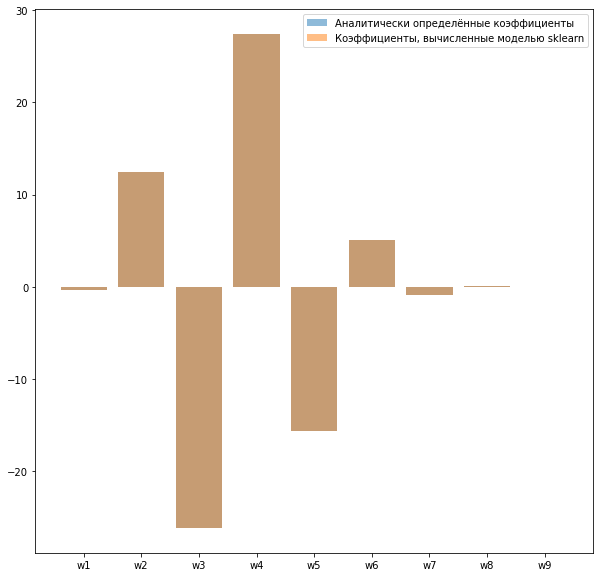

In [4]:
from statsmodels.api import add_constant
from numpy.linalg import inv, norm

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

X_tmp = add_constant(X)
a = 0
w_analytic = np.zeros(X_tmp.shape[1])
w_analytic = inv((X_tmp.T @ X_tmp) + a * np.eye(X_tmp.shape[1], X_tmp.shape[1])) @ (X_tmp.T) @ y

ridge = Ridge(alpha=a).fit(X, y)

print(f'Аналитически определённые коэффициенты {w_analytic}')
print(f"Коэффициенты, вычисленные моделью sklearn {np.concatenate((np.array(ridge.intercept_), np.array(ridge.coef_)), axis=None)}")
print(f"Евклидово расстояние между наборами коэффициентов {norm(np.concatenate((np.array(ridge.intercept_), np.array(ridge.coef_)), axis=None) - w_analytic)}\n")


f, ax = plt.subplots(figsize=(10,10))
ax.bar([f"w{i}" for i in range(1, len(w_analytic)+1)], w_analytic, alpha = 0.5, label='Аналитически определённые коэффициенты')
ax.bar([f"w{i}" for i in range(1, len(np.concatenate((np.array(ridge.intercept_), np.array(ridge.coef_)), axis=None))+1)], 
       np.concatenate((np.array(ridge.intercept_), np.array(ridge.coef_)), axis=None), alpha = 0.5, label='Коэффициенты, вычисленные моделью sklearn')
plt.legend()
plt.show()

# Домашнее задание: подбираем шаг градиентного спуска 

Очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое качество *RMSE* у Вашего решения? Визуализируйте функцию потерь

Итарации остановлены на шаге 191
RMSE = 0.13192326915108543


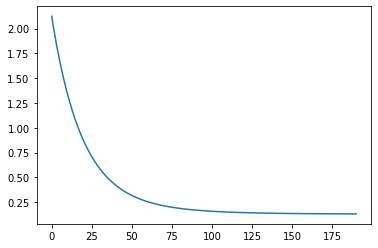

In [5]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) 
y = data['y_train'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)


sgd_regressor = SGDRegressor(
    learning_rate='constant',
    eta0=0.01,
    fit_intercept=True,
    random_state=42
)

w_current = np.random.random(2)
epsilon = 0.0001

weight_evolution, rmse_evolution = [], []

for step in list(range(800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(
        distance.euclidean(w_current, sgd_regressor.coef_)
    )
    if weight_evolution[-1] < epsilon:
        print(f'Итарации остановлены на шаге {step}')
        print(f'RMSE = {rmse_evolution[-1]}')
        break
    rmse_evolution.append(
        mean_squared_error(y_valid, sgd_regressor.predict(X_valid))
    )
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), rmse_evolution)

# Домашнее задание: SGD на многомерных данных

Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

Итарации остановлены на шаге 10369
RMSE = 41.54741059155662
r2-score = 0.6027240827871683


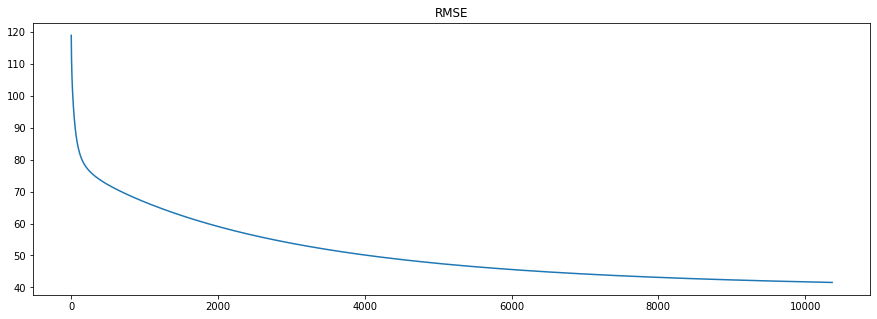

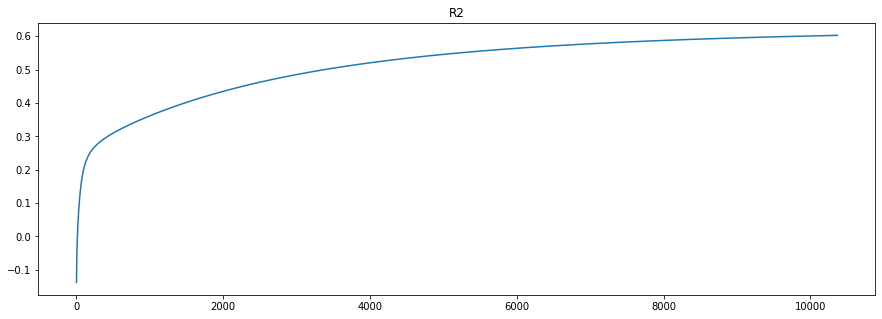

In [36]:
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)


boston_sgd = SGDRegressor(
    learning_rate='constant',
    eta0=0.000001,
    fit_intercept=True,
    random_state=42
)

w_current = np.random.random(X_train.shape[1])
epsilon = 0.0001


weight_evolution, rmse_evolution, r2_evolution = [], [], []

for step in list(range(15000)):
    boston_sgd = boston_sgd.partial_fit(X_train, y_train)
    # weight_evolution.append(distance.euclidean(w_current, np.concatenate((np.array(boston_sgd.intercept_), np.array(boston_sgd.coef_)))))
    weight_evolution.append(distance.euclidean(w_current, boston_sgd.coef_))
    if weight_evolution[-1] < epsilon:
        print(f'Итарации остановлены на шаге {step}')
        print(f'RMSE = {rmse_evolution[-1]}')
        print(f'r2-score = {r2_evolution[-1]}')
        break
    rmse_evolution.append(mean_squared_error(y_valid, boston_sgd.predict(X_valid)))
    r2_evolution.append(r2_score(y_valid, boston_sgd.predict(X_valid)))
    
    w_current = boston_sgd.coef_.copy()
    # w_current = np.concatenate((np.array(boston_sgd.intercept_), np.array(boston_sgd.coef_)))
plt.figure(figsize=(15,5))
plt.title('RMSE')
plt.plot(range(step), rmse_evolution)
plt.figure(figsize=(15,5))
plt.title('R2')
plt.plot(range(step), r2_evolution)

# Домашняя работа: добавляем регуляризацию в SGD

В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} 1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2\cdot 1\right)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2x_k\right)& k\neq 0 \\
\end{array}
\right.
$$

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.

Загружаем исходные данные

In [169]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Код для SGD без регуляризации (исправлена неточность)

step 100 |w-w_next|=0.00417, grad=[-0.5012647   0.14480543]
step 200 |w-w_next|=0.00343, grad=[-0.41250366  0.1191641 ]
step 300 |w-w_next|=0.00283, grad=[-0.33945991  0.09806322]
step 400 |w-w_next|=0.00233, grad=[-0.27935032  0.08069875]
step 500 |w-w_next|=0.00191, grad=[-0.22988459  0.06640908]
step 600 |w-w_next|=0.00158, grad=[-0.18917796  0.05464975]
step 700 |w-w_next|=0.00130, grad=[-0.15567942  0.04497269]
step 800 |w-w_next|=0.00107, grad=[-0.12811261  0.03700919]


<function matplotlib.pyplot.show(*args, **kw)>

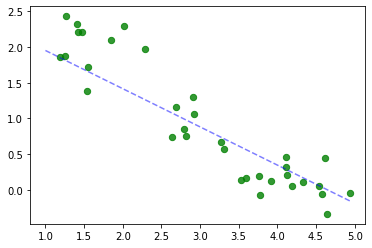

In [219]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0) -> np.array:
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error)  # + X #тут была неточность
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n 
    return grad, error

def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

support = np.linspace(X.min(), X.max(), num=100)
# делаем предикт - считаем предсказания модели в каждой точке обучающей выборке в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)


# строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.show

Код для SGD с регуляризацией https://scikit-learn.org/stable/modules/sgd.html#mathematical-formulation

step 100 |w-w_next|=0.00351, grad=[[-0.42143197  0.12201573]]
step 200 |w-w_next|=0.00278, grad=[[-0.33382752  0.09671872]]
step 300 |w-w_next|=0.00219, grad=[[-0.26239492  0.0760643 ]]
step 400 |w-w_next|=0.00171, grad=[[-0.20499615  0.05945072]]
step 500 |w-w_next|=0.00133, grad=[[-0.15939348  0.04624097]]
step 600 |w-w_next|=0.00103, grad=[[-0.12347786  0.03583093]]


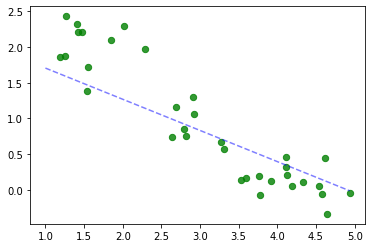

In [221]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0.01, penalty='l2') -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) 
    # print(pointwise_errors.shape, X.shape, error.shape)
    if penalty == 'l2':
        R = 2*alpha*w*w
    elif penalty == 'l1':
        R = alpha*np.sign(w)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n + R
    return grad, error

def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])


w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

support = np.linspace(X.min(), X.max(), num=100)
# делаем предикт - считаем предсказания модели в каждой точке обучающей выборке в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)


# строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.show()

# Домашнее задание: извлечение признаков из текста

Реализуем пайплайн в виде функции, при помощи которой обработаем все текстовые описания. Для каждого описания
* проводим токенизацию
* удаляем пунктуацию
* приводим к нижнему регистру
* удаляем стоп-слова


Примените процедуру токенизации к файлу brand_tweets_valid.csv

Сколько уникальных токенов получилось?

In [72]:
import nltk
import string
import pandas as pd

# дополнительный словарь со знаками пунктуации
nltk.download('punkt', download_dir='.')

df = pd.read_csv('data/brand_tweets.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)
print(df.shape)

df.head()

[nltk_data] Downloading package punkt to ....
[nltk_data]   Unzipping tokenizers/punkt.zip.


(3904, 3)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [86]:
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "n't", "'s"
]

In [87]:
def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    filtered_tokens = []
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if ( i not in (string.punctuation) )]
    filtered_tokens = [i for i in tokens if ( i not in stop_words )]
    return filtered_tokens

tokenized_tweets= df.tweet_text.apply(tokenize_text)
df = df.assign(tokenized=tokenized_tweets)
df.tokenized.head()

0    [wesley83, 3g, iphone, 3, hrs, tweeting, rise_...
1    [jessedee, know, fludapp, awesome, ipad/iphone...
2    [swonderlin, wait, ipad, 2, also, should, sale...
3    [sxsw, hope, year, festival, crashy, year, iph...
4    [sxtxstate, great, stuff, fri, sxsw, marissa, ...
Name: tokenized, dtype: object

# Домашнее задание: поиск дубликатов в тексте

Потренируйтесь в нахождении матрицы схожести для валидационного сета

загрузите brand_tweets_valid.csv
примените объект vectorizer, обученный на датасете brand_tweets.csv (просто скопируйте этот код из урока)
примените функцию pairwise_distances к полученной матрице

In [91]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances

df_valid = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

vectorizer = CountVectorizer(tokenizer=tokenize_text)
document_matrix = vectorizer.fit_transform(df.tweet_text.values)
document_matrix

<3904x7256 sparse matrix of type '<class 'numpy.int64'>'
	with 45360 stored elements in Compressed Sparse Row format>

In [94]:
tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")
tweet_distance.shape
print(tweet_distance)

[[1.         0.06933752 0.09805807 ... 0.15384615 0.07412493 0.1672484 ]
 [0.06933752 1.         0.1767767  ... 0.2773501  0.06681531 0.07537784]
 [0.09805807 0.1767767  1.         ... 0.09805807 0.09449112 0.10660036]
 ...
 [0.15384615 0.2773501  0.09805807 ... 1.         0.07412493 0.1672484 ]
 [0.07412493 0.06681531 0.09449112 ... 0.07412493 1.         0.16116459]
 [0.1672484  0.07537784 0.10660036 ... 0.1672484  0.16116459 1.        ]]


In [105]:
source_tweet_index = 14
print(f'Исходный твит:\n\t{df.iloc[source_tweet_index].tweet_text}\n\nТоп-5 похожих твитов:')
sorted_similarity = np.argsort(-tweet_distance[source_tweet_index,:])
for i in range(1, 6):
    print(f'{i}\t {df.iloc[sorted_similarity[i]].tweet_text}')

Исходный твит:
	haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw

Топ-5 похожих твитов:
1	 RT haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw (via @michaelpiliero)
2	 Great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l
3	 RT haha, awesomely rad iPad app by @mention {link} #hollergram #sxsw (via @mention
4	 Very smart from @madebymany #hollergram iPad app for #sxsw! http://t.co/A3xvWc6 (may leave my vuvuzela at home now)
5	 You must have this app for your iPad if you are going to #SXSW http://itunes.apple.com/us/app/holler-gram/id420666439?mt=8 #hollergram


* Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с id=14.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение

In [154]:
from operator import itemgetter


def search_similar_tweets(tweet_distance, source_tweet_index, alpha):
    dict_similarity = {}
    for i, val in enumerate(tweet_distance[source_tweet_index,:]):
        if val > alpha:
            dict_similarity[i] = - val
    sorted_dict_similarity = sorted(dict_similarity.items(), key=itemgetter(1)) 
    sorted_similarity = [x[0] for x in sorted_dict_similarity]
    return sorted_similarity
    

In [156]:
source_tweet_index = 14
alpha = 0.5
sorted_similarity = search_similar_tweets(tweet_distance, source_tweet_index, alpha)

print(f'Исходный твит:\n\t{df.iloc[sorted_similarity[0]].tweet_text}\nТоп похожих твитов:')
for i in range(1, len(sorted_similarity)):
    print(f'{i}\t {df.iloc[sorted_similarity[i]].tweet_text}')

Исходный твит:
	haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw
Топ похожих твитов:
1	 RT haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw (via @michaelpiliero)
2	 Great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l
3	 RT haha, awesomely rad iPad app by @mention {link} #hollergram #sxsw (via @mention
4	 Very smart from @madebymany #hollergram iPad app for #sxsw! http://t.co/A3xvWc6 (may leave my vuvuzela at home now)
5	 You must have this app for your iPad if you are going to #SXSW http://itunes.apple.com/us/app/holler-gram/id420666439?mt=8 #hollergram
6	 RT haha, awesomely rad iPad app by @mention {link} #hollergram #sxsw (via @mention @mention
7	 Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB


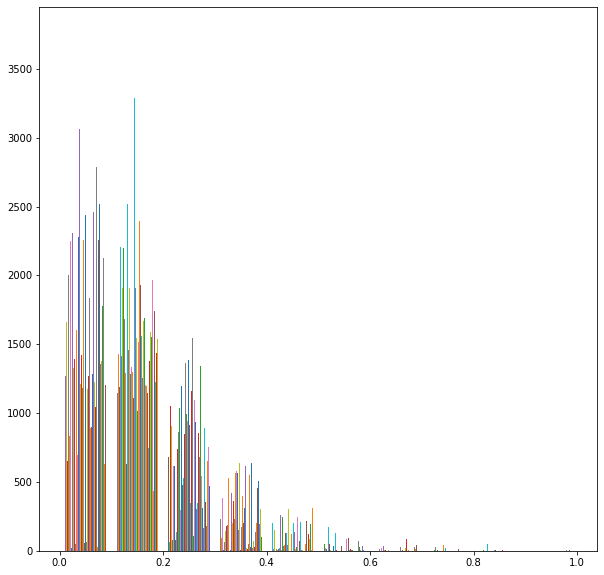

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.hist(tweet_distance)
plt.show()